In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
import numpy as np

In [4]:
#Построение элементарного многочлена Лагранджа
def lk(x_new, a_x, k):
    lk = 1
    for a in a_x:
        lk = lk*(x_new - a)/(a_x[k]-a) if a != a_x[k] else lk
    return lk

In [5]:
#Построение полинома
def lagrange(x_new, a_x, a_y):
    p = 0
    for k in range(len(a_y)):
        p = p + a_y[k]*lk(x_new, a_x, k)
    return p

Можно улучшить время

In [6]:
# Грубо говоря, это часть итоговой суммы, которая на зависит от x_new, считается один раз
def z(a_x, a_y):
    z = []
    for k in range(len(a_x)):
        t = 1
        for x in a_x:
            t = t * (a_x[k]-x) if x != a_x[k] else t
        z.append(a_y[k]/t)
    return z

In [7]:
# За скобочки грубо говоря выносим почти одинаковые множители из итоговой суммы
def w(x_new, a_x):
    p = 1
    for x in a_x:
        p = p * (x_new - x)
    return p

In [8]:
# Производим оставшееся суммирование
def s(x_new, a_x, z_in):
    s = 0
    for k in range(len(a_x)):
        s = s + z_in[k]/(x_new - a_x[k])
    return s

In [9]:
def lagr(x_new, a_x , a_y, z_in):
   # if a_x.count(x_new):
   #     p = a_y[a_x.index(x_new)]
   # else:
   #z_in = z(a_x, a_y)
    p = w(x_new, a_x) * s(x_new, a_x, z_in)
    return p

Исследование интерполяции функции Рунге $\frac{1}{1+25x^2}$

In [10]:
x = np.linspace(-1.1, 1.1, 3000)
y_true = [(1/(1+25*i**2)) for i in x]

На равномерной сетке

<IPython.core.display.Javascript object>


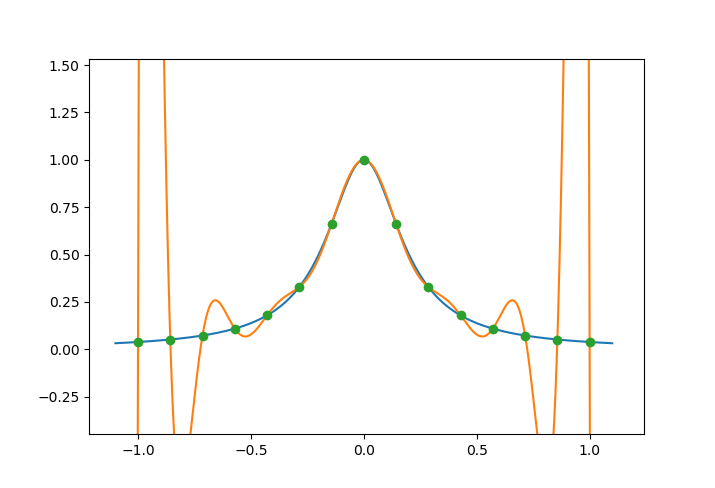

In [11]:
N = 15
a_x = list(np.linspace(-1, 1, N))
a_y = [(1/(1+25*i**2)) for i in a_x]
#y_0 = [lagrange(x_new, a_x, a_y) for x_new in x]
###############################################
z_in = z(a_x, a_y)
y = [lagr(x_new, a_x, a_y, z_in) for x_new in x]
plt.plot(x, y_true)
plt.plot(x, y)
plt.plot(a_x, a_y, 'o')

Узлы Чебышева

<IPython.core.display.Javascript object>


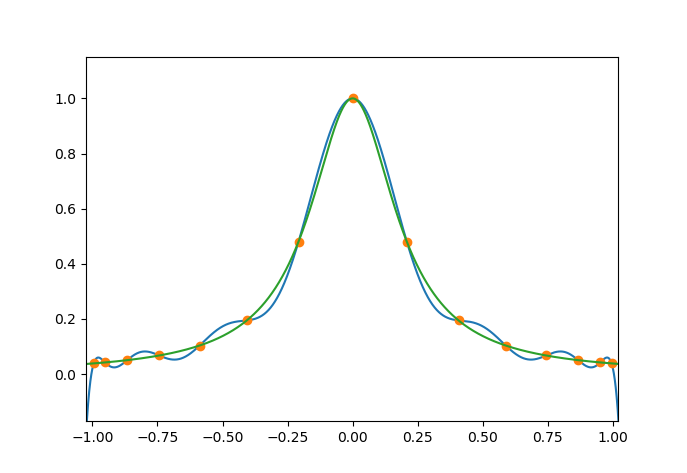

In [12]:
a_x_cheb = [np.cos((2*i-1)/2/N*np.pi) for i in range(1,N+1)]
a_y_cheb = [(1/(1+25*i**2)) for i in a_x_cheb]
#y_cheb = [lagrange(x_new, a_x_cheb, a_y_cheb) for x_new in x]
############################################################
z_in_cheb = z(a_x_cheb, a_y_cheb)
y_cheb = [lagr(x_new, a_x_cheb, a_y_cheb, z_in_cheb) for x_new in x]
plt.plot(x, y_cheb)
plt.plot(a_x_cheb, a_y_cheb, 'o')
plt.plot(x,y_true)

Time test

In [13]:
%timeit y_0 = [lagrange(x_new, a_x, a_y) for x_new in x]
%timeit y = [lagr(x_new, a_x, a_y, z_in) for x_new in x]
%timeit y_cheb_0 = [lagrange(x_new, a_x_cheb, a_y_cheb) for x_new in x]
%timeit y_cheb = [lagr(x_new, a_x_cheb, a_y_cheb, z_in_cheb) for x_new in x]
%timeit z_in_cheb = z(a_x_cheb, a_y_cheb)

714 ms ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
63.1 ms ± 6.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
708 ms ± 8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
57.7 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
134 µs ± 203 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Error

<IPython.core.display.Javascript object>


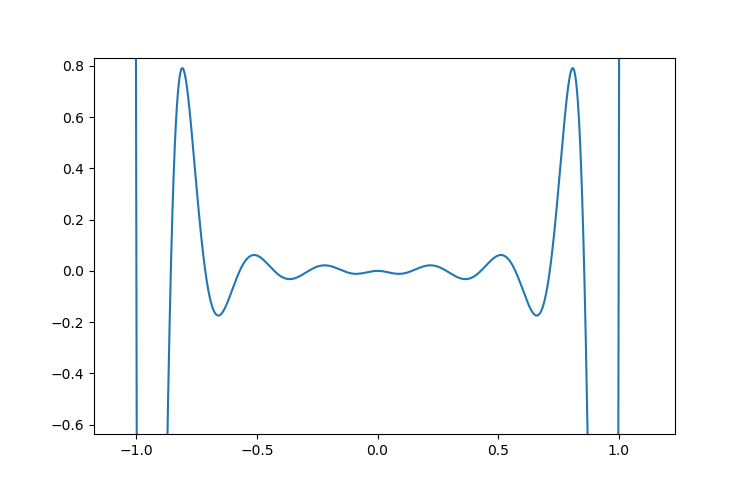

In [14]:
y_err = []
for k in range(len(x)):
    y_err.append(y_true[k]-y[k])
plt.plot(x, y_err)

<IPython.core.display.Javascript object>


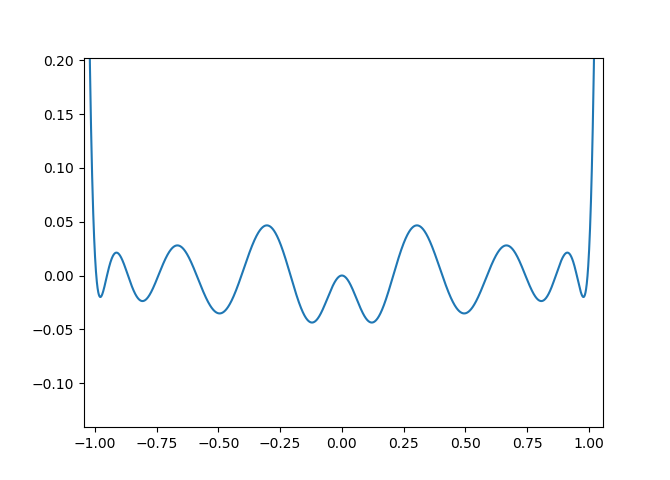

In [15]:
y_errch = []
for k in range(len(x)):
    y_errch.append(y_true[k]-y_cheb[k])
plt.plot(x, y_errch)